# Part III: Hands-on Session

In [ ]:
using KhepriTikZ
using KhepriIllustrator

In [ ]:
render_size(1000, 600)

## Exercise <span style="color:#a1a1cf">**1**</span>

As an example, consider a flight of stairs as outlined in this figure:

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">

Define a function `stairs` that, given the point $P$, the tread depth $d$, the rise height $h$, and the number of steps $n$, creates a flight of stairs with the first step starting at $P$.

**<span style="color:#a1a1cf">Suggestion</span>**: 
- Create a function that creates one step (e.g., `step`).
- Iteratively call this function within the function `stairs` to create $n$ steps.

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/stair.jpg" width="500" height="300"></center>



### Solutions

##### Option 1

In [ ]:
# Option 1
@illustrator stairs1(p, d, h, n) =
    for i in 1:n
        let p_1 = p,
            p_2 = p_1 + vy(h),
            p_3 = p_1 + vx(d)
          line(p_1, p_2, p_3)
          p = p_3
        end
    end

In [ ]:
delete_all_shapes()
@illustrator stairs1(xy(0, 0), 3, 1.5, 5)
render_view()

##### Option 2

In [ ]:
@illustrator stairs2(p, c, e, n) =
    for i in 1:n
        let p_2 = p + vy(e),
            p_3 = p + vxy(e, c)
            line(p, p_2, p_3)
            p = p_3
        end
    end

<function>

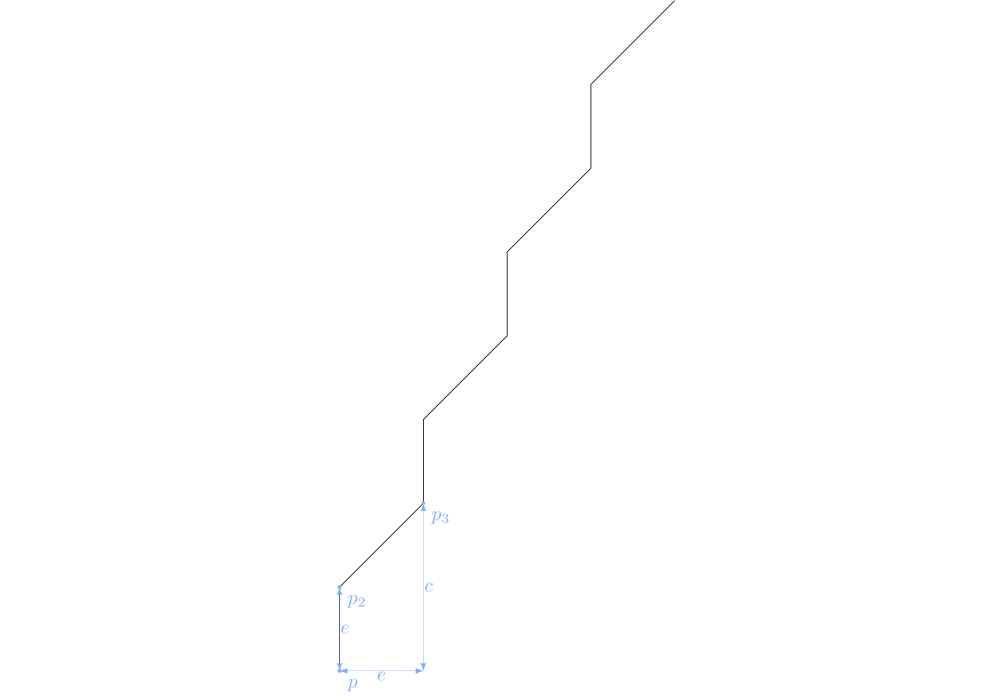

In [ ]:
delete_all_shapes()
@illustrator stairs2(xy(0, 0), 3, 1.5, 4)
render_view()

##### Option 3

In [ ]:
# First define a stair step
@illustrator step(p1, p2, p3) =
    line(p1, p2, p3)

In [ ]:
render_size(400, 200)
delete_all_shapes()
@illustrator step(u0(), y(1.5), xy(3, 1.5))
render_view()

In [ ]:
# Then define the stairs function by calling the function step.
@illustrator stairs3(p, c, e, n) =
    let ρ = sqrt(c^2 + e^2),
        α = atan(e/c)
        for i in 0:n-1
            let v = vpol(i*ρ,i*α),
                p_1 = p + v,
                p_2 = p_1 + vy(e),
                p_3 = p_2 + vx(c)
                step(p_1, p_2, p_3)
            end
        end
    end

In [ ]:
render_size(1000, 800)
delete_all_shapes()
# illustrate 4 steps
with(for_steps_limit, 4) do 
    @illustrator stairs3(u0(), 3, 1.5, 5)
end
render_view()

##### Option 4

In [ ]:
# using array comprehension
@illustrator stairs4(p, c, e, n) =
    let p_i = p,
        ps = [p_i + vxy(c*i, e*i) 
              for i in 1:n]
    [step(p, p + vy(e), p + vxy(c, e)) for p in ps]
    end


In [ ]:
render_size(1000, 800)
delete_all_shapes()
@illustrator stairs4(u0(), 3, 1.5, 5)
render_view()

## Exercise <span style="color:#a1a1cf">**2**</span>

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">

Define a function `equilateral_triangles` that generates the result shown on the right, given the following input:
- the centre $P$ of the sequence of equilateral triangles, 
- the side length $s$ of the largest triangle, 
- the orientation angle $\alpha_i$ of the first triangle, 
- the number of triangles $n$ to create.

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/triangulos_altern.png" width="480" height="430"></center>


### Solution

In [ ]:
@illustrator equilateral_triangles(p, s, α_i, n) = 
    let Δα = 2π/3.0 # triangle internal angles
        # create N triangles
        for i in 1:n
            let ρ = s/2/sin(Δα/2),
                α_1 = i%2==0 ? α_i : α_i - pi,
                α_2 = α_1 + Δα,
                α_3 = α_1 + Δα
                polygon(p + vpol(ρ, α_1), 
                        p + vpol(ρ, α_2), 
                        p + vpol(ρ, α_3))
                s = s/2
            end 
        end
    end


In [ ]:
render_size(600, 500)
delete_all_shapes()
@illustrator equilateral_triangles(xy(0, 0), 6, π/2, 4)
render_view()

In [ ]:
render_size(800, 400)
delete_all_shapes()
equilateral_triangles(xy(0, 0), 3, π/2, 4)
equilateral_triangles(xy(5, 0), 5, π/4, 6)
equilateral_triangles(xy(11, 0), 6, -π/2, 8)
render_view()

## Exercise <span style="color:#a1a1cf">**3**</span>

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">

Define a function `centred_polygons` that generates centered regular polygons that rotate and progressively decrease in size (see right-side image) given:
- the sequence centre $P$, 
- the polygons' number of sides $n_{sides}$, 
- the radius $r$ of the largest polygon, 
- the radii's reduction factor $f$, 
- the number of polygons $n$ to create.

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/poligono_rec.png" width="450" height="410"></center>





### Solutions

In [ ]:
# Solution
@illustrator centred_polygons(p, n_sides, r, f, n) =
    for i in 1:n
      let r_i = r*f,
          α_i = pi/n_sides
          # regular_polygon(nsides, center, radius, initial α, inscribed (true) or circumscribed (false))
          regular_polygon(n_sides, p, r_i, α_i, true)
      end
    end

In [ ]:
render_size(800, 400)
delete_all_shapes()
n_polygons = 5
# illustrate all steps
with(for_steps_limit, n_polygons) do 
    @illustrator centred_polygons(x(0), 4, 10, 0.5, n_polygons)
end
render_view()

In [ ]:
render_size(500,500)
delete_all_shapes()
@illustrator centred_polygons(x(0), 4, 5, 0.7, 8)
render_view()

In [ ]:
delete_all_shapes()
@illustrator centred_polygons(x(0), 5, 5, 0.8, 8)
render_view()

In [ ]:
delete_all_shapes()
@illustrator centred_polygons(x(0), 6, 5, 0.85, 8)
render_view()

## Exercise <span style="color:#a1a1cf">**4**</span>

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">


Define a function `diagonal_squares` that generates the sequences of squares shown on the right, given:
- the bottom-left corner $P$ of the leftmost and largest square,
- the side length $l$ of this square, 
- the reduction factor $f$ applied to successive squares,
- the number of squares $n$ to create.

</div> 
  <div style="flex: 1; padding-left: 10px;">
  
  <center><img src="images/seq_quadrados.png" width="550" height="240"></center>

### Solution

In [ ]:
# Solutions
@illustrator diagonal_squares(p, l, f, n) =
    for i in 0:n-1
        let f_i = f^i,
            l_i = l*f,
            p_i = p + vxy(l_i, l_i)
        rectangle(p_i, l_i, l_i)
        p = p_i
        end
    end

In [ ]:
render_size(1200, 600)
delete_all_shapes()
# illustrate 3 steps
with(for_steps_limit, 3) do
    @illustrator diagonal_squares(u0(), 2, 0.8, 5)
end
render_view()

In [ ]:
delete_all_shapes()
@illustrator diagonal_squares(x(0), 4, 0.65, 8)
@illustrator diagonal_squares(x(12), 5, 0.35, 6)
render_view()

## Exercise <span style="color:#a1a1cf">**5**</span>



<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">

Create a function `rosette` that generates shapes similar to the one shown n the right, given the following parameters:

- the shape centre ($P$),
- the number of "petals" ($n$),
- the orientation angle of the first "petal" ($\alpha$),
- the inner, middle, and outer radii of the petals ($r_{in},r_{mid},r_{out}$).

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/rosette.jpg" width="300" height="300"></center>

### Solution

In [ ]:
# solution
@illustrator roseta(p, n, α, r_in, r_mid, r_out) =
    let Δα = 2pi/n
     for i in 0:n
        let α_i = α + Δα,, 
            p_1 = p + vpol(r_in, α_i),
            p_2 = p + vpol(r_mid, α_i + Δα/4),
            p_3 = p + vpol(r_in, α_i + 2Δα/4),
            p_4 = p + vpol(r_mid, α_i + 3Δα/4),
            p_5 = p + vpol(r_in, α_i + 4Δα/4)
        line(p_1,p_2,p_3,p_4,p_5)
        end
     end
    end

In [ ]:
render_size(700, 700)
delete_all_shapes()
@illustrator roseta(xy(0,0), 4, 0, 2, 4.5, 6)
render_view()

In [ ]:
delete_all_shapes()
@illustrator roseta(xy(0,0), 6, pi/4, 1, 3, 3.5)
render_view()

In [ ]:
render_size(800, 500)
delete_all_shapes()
@illustrator roseta(xy(0,0), 3, 0, 1.5, 3.5, 3)
@illustrator roseta(xy(9,0), 5, pi/2, 1.5, 5.5, 4.5)
render_view()

In [ ]:
render_size(500,500)
delete_all_shapes()
@illustrator roseta(xy(0,0), 5, pi, 1.5, 3.5, 4)
render_view()

## Exercise <span style="color:#a1a1cf">**6**</span>



<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">

Consider the sequence of **increasingly smaller** circles arranged vertically and tangent to one another, as shown on the right.

<span style="color:#a1a1cf">**6.1.**</span> Define a function `stacked_circles` that creates this sequence, given:
- the bottom point $P$ of the lowest circle,
- the radius size $r$ of the lowest circle,
- the reduction factor $f$ applied to successive circles,
- the number of circles $n$ to stack.


</div> 
  <div style="flex: 1; padding-left: 10px;">

  <center><img src="images/stacked_circles1.jpg" width="600" height="420"></center>

### Solution

In [ ]:
 @illustrator stacked_circles(p, r, f, n) =
    for i in 0:n-1
        let r_i = r*f^i,
            p_c = p + vy(r_i)
            circle(p_c, r)
            p = p + vy(r_i)
        end
    end

In [ ]:
delete_all_shapes()
with(for_steps_limit, 3) do
    @illustrator stacked_circles(u0(), 2.5, 0.65, 5)
end
render_view()

In [ ]:
render_size(1000,700)
delete_all_shapes()
@illustrator stacked_circles(x(0), 3, 0.35, 3)
@illustrator stacked_circles(x(6), 3, 0.55, 5)
@illustrator stacked_circles(x(12), 2.5, 0.75, 6)
@illustrator stacked_circles(x(17), 1.5, 0.9, 6)
render_view()



<div style="display: flex; align-items: flex-start;">
  <div style="width: 700px; padding-right: 10px;">



<span style="color:#a1a1cf">**6.2.**</span> Redefine the `stacked_circles` function to make the circles decrease according to a **random factor** ranging between 25% and $f$, as shown on the right.


</div> 

<div style="flex: 1; padding-left: 10px;">
  

<center><img src="images/stacked_circles_rand.svg" width="500" height="550"></center>

</div>

### Solution

In [ ]:
 @illustrator stacked_circles(p, r, f, n) =
    for i in 0:n-1
        let f = random_range(0.25, f),
            r_i = r*f,
            p_c = p + vy(r_i)
            circle(p_c, r_i)
            p = p + vy(2*r_i)
        end
    end

In [ ]:
render_size(1000,600)

delete_all_shapes()
# illustrate 2 steps
with(for_steps_limit, 2) do
    @illustrator stacked_circles(u0(), 3, 1.0, 6)
end
render_view()

In [ ]:
render_size(1000,600)

delete_all_shapes()
@illustrator stacked_circles(u0(), 5, 1.0, 6)
@illustrator stacked_circles(x(7), 6, 0.8, 7)
@illustrator stacked_circles(x(16), 5, 1.0, 8)
render_view()

## Exercise <span style="color:#a1a1cf">**7**</span>


<div style="display: flex; align-items: flex-start;">
  <div style="flex: 0.4; padding-right: 10px;">
  
Create a function `tangle` that generates $n$ segments with random lengths and random orientation in increments of $\pi/2$, as shown on the right.

The function should receive:
- the starting point $P$,
- the segments maximum length $l_{max}$, and 
- the number of segments to create $n$.

The segments should vary their length according to a random factor between 50% to 100% of the maximum length allowed $l_{max}$.



</div> 
  <div style="flex: 0.6; padding-left: 10px;">


<center><img src="images/random_walk1.jpg" width="300" height="390"></center>

### Solution

In [ ]:
@illustrator tangle(p, l_max, n) =
    # create N segments
    for i in 1:n
        rand_ρ = random_range(0.50, 1.0)*l_max
        rand_α = random(4)*π/2
        q = p + vpol(rand_ρ, rand_α)
        line(p, q)
    end

In [ ]:
render_size(600,600)
delete_all_shapes()
# illustrate 2 steps
with(for_steps_limit, 5) do
    @illustrator tangle(u0(), 2, 40)
end
render_view()

## <span style="color:#a1a1cf">**Final**</span> Exercise 

### Introduction


<div style="display: flex; align-items: flex-start;">
  <div style="flex: 0.35; padding-right: 10px;">
  
In architecture, numerous examples showcase buildings façades whose design is driven by the repetition of a single element, with or without variations in form, visually creating a **pattern**. 

On the right are examples of buildings where the repetition of façade elements generates visually complex effects.

```




```

In this context, consider the following set of examples, where a single element is mapped across a surface, creating a **pattern**.

These elements can not only move through space but also adjust their dimensions and other shape-related parameters according to different rules.


#####  <span style="color:#a1a1cf">**Step 1**</span> - Defining the `Pattern` function

To create a pattern, we can use the `pattern` function, which takes:
- the **element** to distribute ($shape$),
- the **number** of times the element is repeated along $X$ ($n$) and $Y$ ($m$) dimensions:

Then, it maps the element (`shape`) onto a $10$ *X* $10$ rectangular grid consisting of $N$ *X* $M$ cells.

</div> 
<div style="flex: 0.65; padding-left: 10px;">


<center><img src="images/facades2.jpg" width="900" height="600"></center>




<div style="display: flex; align-items: flex-start;">
  <div style="flex: 0.4; padding-right: 10px;">



```julia
grid_size = 10

pattern(shape, n, m) = 
    iterate_quads(shape, 
                  # grid creation
                  map_division(xy, 
                               0, grid_size, n,    # starting X, ending X, Nº divisions
                               0, grid_size, m))    # starting Y, ending Y, Nº divisions
```


The example on the right shows the division of a squared area into a $4 \times 4$ grid.

</div> 
  <div style="flex: 0.6; padding-left: 10px;">

<center><img src="images/grid.svg" width="350" height="350"></center>

In [ ]:
#implementing Pattern function
grid_size = 10

pattern(shape, n, m) = 
    iterate_quads(shape, map_division(xy, 0, grid_size, n, 0, grid_size, m))

#####  <span style="color:#a1a1cf">**Step 2**</span> - Creating a *pattern* based on circular elements

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">

The pattern on the **right** is the result of calling the `pattern` function with:
- the `centered_circle` function (*which generates a circle centered between 4 given points*):

```julia
centered_circle(p1,p2,p3,p4) =           # grid cell corners
    let c = quad_center(p1,p2,p3,p4),    # calculating the centroid
        r = min(distance(p1, p2),        # calculating the circle radius
                distance(p1, p4))/2      # (must remain within the limits in both directions)
        circle(c, r)
    end
```

- and both $n$ and $m$ parameters set to `4`.

```julia
pattern(centered_circle, 4, 4)

```

**Note:** `quad_center` is a predefined function that calculates the midpoint between 4 points.

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/circles.svg" width="350" height="350"></center>

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 0.4; padding-right: 20px;">


The example on the left is the result of:

```julia
centered_circle(x(0), x(2), xy(2,2), y(2))
```


</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/circle.svg" width="300" height="300"></center>

In [ ]:
# Defining centered_circle 
centered_circle(p1,p2,p3,p4) = 
    let c = quad_center(p1,p2,p3,p4),
        r = min(distance(p1, p2), distance(p1, p4))/2
        circle(c, r)
    end

In [ ]:
# Testing    
delete_all_shapes()
render_size(400, 400)
delete_all_shapes()
pattern(centered_circle, 4, 4)
render_view()

##### <span style="color:#a1a1cf">**Step 3**</span> - Testing *pattern* variations

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">

Let's adjust `centered_circle` to create circles with random radii, varying between **30%** and **100%** of the maximum possible radius.


```julia
centered_circle(p1, p2, p3, p4) = 
    let c = quad_center(p1, p2, p3, p4),
        r = min(distance(p1, p2), 
                distance(p1, p4))/2
        circle(c, r*random_range(0.30, 1))    # radius is multiplied by a random factor
    end

```

The example on the right is the result of calling the `pattern` function with the new `centered_circle` definition.

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/circles_rand.svg" width="350" height="350"></center>

In [ ]:
# Redefining the function
centered_circle(p1, p2, p3, p4) = 
    let c = quad_center(p1, p2, p3, p4),
        r = min(distance(p1, p2), distance(p1, p4))/2
        circle(c, r*random_range(0.3,1))
    end

In [ ]:
# testing 
delete_all_shapes()
render_size(400, 400)
delete_all_shapes()
pattern(centered_circle, 4, 4)
render_view()

### <span style="color:#a1a1cf">**Pattern**</span> application examples

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">



#### <span style="color:#a1a1cf">**1.**</span> Random polygons


The image on the right illustrates the result of calling the `pattern` function with:
- a function that creates random polygons (`rand_polygon`) 
- and both $n$ and $m$ set to $10$.


```julia

pattern(rand_polygon, 10, 10)

```

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center>

<img src="images/rand_polygons.jpg" width="350" height="350"></center>



<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">

  
Like the `centered_circle` function, `rand_polygon` takes *four* points (the *grid cell* corners), returning a four-sides polygon with randomly sized edges.

```julia

rand_polygon(p1, p2, p3, p4) =
    # calculating polygon's (random) corners
    let pm1 = intermediate_loc(p1, p2, random(1.0)),
        pm2 = intermediate_loc(p2, p3, random(1.0)),
        pm3 = intermediate_loc(p3, p4, random(1.0)),
        pm4 = intermediate_loc(p4, p1, random(1.0))
        surface_polygon(pm1, pm2, pm3, pm4)
    end

```

**Notes**: 
- `intermediate_loc` is a predefined function that calculates a point between two given points (`p`, `q`) based on a factor `κ`. 
   (e.g., if `κ=0.5` $\rightarrow$ returns the midpoint between `p` and `q`).


- `surface_polygon` is a predefined function that creates a polygonal area between a set of $N$ points.

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center>

<img src="images/rand_polygon.jpg" width="700" height="350"></center>

In [ ]:
# Defining rand_polygon for the illustrator 
@illustrator rand_polygon(p_1, p_2, p_3, p_4) =
    let pm_1 = intermediate_loc(p_1, p_2, random(1.0)),
        pm_2 = intermediate_loc(p_2, p_3, random(1.0)),
        pm_3 = intermediate_loc(p_3, p_4, random(1.0)),
        pm_4 = intermediate_loc(p_4, p_1, random(1.0))
        surface_polygon(pm_1, pm_2, pm_3, pm_4)
    end

In [ ]:
# testing
render_size(700, 700)
delete_all_shapes()
@illustrator rand_polygon(x(0), x(6), xy(6,6), y(6))
render_view()

In [ ]:
# Defining rand_polygon & testing with Pattern
rand_polygon(p_1, p_2, p_3, p_4) =
    let pm_1 = intermediate_loc(p_1, p_2, random(1.0)),
        pm_2 = intermediate_loc(p_2, p_3, random(1.0)),
        pm_3 = intermediate_loc(p_3, p_4, random(1.0)),
        pm_4 = intermediate_loc(p_4, p_1, random(1.0))
        surface_polygon(pm_1, pm_2, pm_3, pm_4)
    end
    
render_size(400, 400)
delete_all_shapes()
# Creating a 7x7 random polygons pattern
pattern(rand_polygon, 7, 7)
render_view()

#### <span style="color:#a1a1cf">**2.**</span> Framed windows

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">


The `frame` function creates a window frame between *four* given points, as illustrated on the right.

According to the definition below, the window *opening factor* `κ` is set to $0.5$.

```julia
frame(p1, p2, p3, p4) =
    let c = quad_center(p1, p2, p3, p4),    # calculating the centroid    
        κ = 0.5,
        # calculating the midpoints bewteen each given point and the centroid
        pm1 = intermediate_loc(c, p1, κ),
        pm2 = intermediate_loc(c, p2, κ),
        pm3 = intermediate_loc(c, p3, κ),
        pm4 = intermediate_loc(c, p4, κ)
        # creating the frame
        surface_polygon([p1, p2, pm2, pm1])
        surface_polygon([p2, p3, pm3, pm2])
        surface_polygon([p3, p4, pm4, pm3])
        surface_polygon([p4, p1, pm1, pm4])
    end

```


</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/frame.jpg" width="440" height="320"></center>

</div></div>


In [ ]:
# Defining the function for the Illustrator
@illustrator frame(p_1, p_2, p_3, p_4) =
    let c = quad_center(p_1, p_2, p_3, p_4),
        κ = 0.5 ,
        pm_1 = intermediate_loc(c, p_1, κ),
        pm_2 = intermediate_loc(c, p_2, κ),
        pm_3 = intermediate_loc(c, p_3, κ),
        pm_4 = intermediate_loc(c, p_4, κ)
        surface_polygon([p_1, p_2, pm_2, pm_1])
        surface_polygon([p_2, p_3, pm_3, pm_2])
        surface_polygon([p_3, p_4, pm_4, pm_3])
        surface_polygon([p_4, p_1, pm_1, pm_4])
    end

In [ ]:
# testing it
render_size(400, 400)
delete_all_shapes()
@illustrator frame(x(0), x(4), xy(4,4), y(4))
render_view()

<div style="display: flex; align-items: flex-start;">
  <div style="flex: 1; padding-right: 10px;">


The result of calling the `pattern` function with the `frame` function and setting both $n$ and $m$ parameters to $4$ is illustrated on the right:

```julia
pattern(frame, 4, 4)
```

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/pattern.jpg" width="350" height="350"></center>

In [ ]:
# Implementing frame function  
frame(p_1, p_2, p_3, p_4) =
    let c = quad_center(p_1, p_2, p_3, p_4),
        κ = 0.5,        # try changing this value and see the result.
        pm_1 = intermediate_loc(c, p_1, κ),
        pm_2 = intermediate_loc(c, p_2, κ),
        pm_3 = intermediate_loc(c, p_3, κ),
        pm_4 = intermediate_loc(c, p_4, κ)
        surface_polygon([p_1, p_2, pm_2, pm_1])
        surface_polygon([p_2, p_3, pm_3, pm_2])
        surface_polygon([p_3, p_4, pm_4, pm_3])
        surface_polygon([p_4, p_1, pm_1, pm_4])
    end


In [ ]:
# testing
render_size(400, 400)
delete_all_shapes()
pattern(frame, 4, 4)
render_view()


<div style="display: flex; align-items: flex-start;">
  <div style="flex: 0.65; padding-right: 10px;">

##### <span style="color:#a1a1cf">**2.1.**</span> Variation 1 - **Random κ**

The function below is a variation of the `frame` function that creates window frames with randomly sized *openings*.

This means that, unlike the `frame` function where it is fixed, the *opening factor* (`κ`) varies randomly.

```julia
rand_frame(p_1, p_2, p_3, p_4) =
    let c = quad_center(p_1, p_2, p_3, p_4),
        # random variation between 0.1 and 1
        κ = random_range(0.1, 1),             
        pm_1 = intermediate_loc(c, p_1, κ),
        pm_2 = intermediate_loc(c, p_2, κ),
        pm_3 = intermediate_loc(c, p_3, κ),
        pm_4 = intermediate_loc(c, p_4, κ)
        surface_polygon([p_1, p_2, pm_2, pm_1])
        surface_polygon([p_2, p_3, pm_3, pm_2])
        surface_polygon([p_3, p_4, pm_4, pm_3])
        surface_polygon([p_4, p_1, pm_1, pm_4])
    end
```


The result of calling `pattern` with the `rand_frame` function and both $n$ and $m$ parameters set to $10$ is illustrated on the top-right:

```julia
pattern(rand_frame, 10, 10)
```


As observed, each frame presents a distinct *opening factor* `κ`, creating a **randomly** variable pattern.

</div> 
  <div style="flex: 1; padding-left: 10px;">

<center><img src="images/rand_frame.jpg" width="400" height="400">

<br><br>

<img src="images/random_squares_ex.jpg" width="400" height="270">

<p style="font-size: 11px;"> White Walls by Ateliers Jean Nouvel, Nicosia , Cyprus </p></center>


</div> </div> 



In [ ]:
# test
rand_frame(p_1, p_2, p_3, p_4) =
    let c = quad_center(p_1, p_2, p_3, p_4)
        κ = random_range(0.1, 1)
        pm_1 = intermediate_loc(p_1, c, κ)
        pm_2 = intermediate_loc(p_2, c, κ)
        pm_3 = intermediate_loc(p_3, c, κ)
        pm_4 = intermediate_loc(p_4, c, κ)
        surface_polygon([p_1, p_2, pm_2, pm_1])
        surface_polygon([p_2, p_3, pm_3, pm_2])
        surface_polygon([p_3, p_4, pm_4, pm_3])
        surface_polygon([p_4, p_1, pm_1, pm_4])
    end
    
render_size(400, 400)
delete_all_shapes()
pattern(rand_frame, 10, 10)
render_view()

##### <span style="color:#a1a1cf">**2.2.**</span> Variation 2 - **Incremental κ**

The `sin_frame` is another variation of the `frame` function that creates window frames with **progressively larger openings** along X. 

In this case, the *opening factor* `κ` **depends** on the given **positions**, increasing with the $X$-coordinate of their center (`c`):



<div style="display: flex; align-items: flex-start;">
  <div style="flex: 0.65; padding-right: 10px;">

$$κ = \sin\!\left(c_x \dfrac{\dfrac{\pi}{2}}{\text{lenght}_x}\right)

$$

where $c_x$ is the $X$-value of central point `c`, and $\text{lenght}_x$ is the total length along $X$-axis.

```julia

sin_frame(p_1, p_2, p_3, p_4) =
    let c = quad_center(p_1, p_2, p_3, p_4),
        # X is multiplied by π/2 to ensure increasing sin values
        κ = sin(c.x*π/2/grid_size),               
        pm_1 = intermediate_loc(c, p_1, κ),
        pm_2 = intermediate_loc(c, p_2, κ),
        pm_3 = intermediate_loc(c, p_3, κ),
        pm_4 = intermediate_loc(c, p_4, κ)
        surface_polygon([p_1, p_2, pm_2, pm_1])
        surface_polygon([p_2, p_3, pm_3, pm_2])
        surface_polygon([p_3, p_4, pm_4, pm_3])
        surface_polygon([p_4, p_1, pm_1, pm_4])
    end
    
```

The result of calling the function `pattern` with the function `sin_frame` and an $n$ and $m$ of $10$ is illustrated on the right:

```julia
pattern(sin_frame, 10, 10)

```


</div> 
  <div style="flex: 1; padding-left: 10px;">


<center><img src="images/incre_frame.jpg" width="400" height="400">

<br><br>

<img src="images/incre_openings_ex2.jpg" width="420" height="300">

<p style="font-size: 11px;">FORMSTELLE by Format Elf Architekten, Töging am Inn, Germany </p></center>

</div> </div> 

In [ ]:
# implementing 
sin_frame(p_1, p_2, p_3, p_4) =
    let c = quad_center(p_1, p_2, p_3, p_4),
        κ = sin(c.x*π/2/grid_size),            # test changing π/2 by π or 2π and see the results
        pm_1 = intermediate_loc(c, p_1, κ),
        pm_2 = intermediate_loc(c, p_2, κ),
        pm_3 = intermediate_loc(c, p_3, κ),
        pm_4 = intermediate_loc(c, p_4, κ)
        surface_polygon([p_1, p_2, pm_2, pm_1])
        surface_polygon([p_2, p_3, pm_3, pm_2])
        surface_polygon([p_3, p_4, pm_4, pm_3])
        surface_polygon([p_4, p_1, pm_1, pm_4])
    end
    

In [ ]:
# testing 
render_size(400, 400)
delete_all_shapes()
pattern(sin_frame, 10, 10)
render_view()

### Design your <span style="color:#a1a1cf">**Pattern**</span>

Based on the previous examples, develop a **new pattern** (or more) of your own. 

Bellow are some ideas for inspiration, but feel free to explore other directions as well.

<img src="images/rand_sides_roseta.jpg" width="300" height="300">
<img src="images/sin_stars.svg" width="300" height="300">
<img src="images/rot_rand_roseta.jpg" width="300" height="300">
<br>
<img src="images/sin_trigs.svg" width="300" height="300">
<img src="images/sin_hexs.svg" width="300" height="300">
<img src="images/rand_lines.svg" width="300" height="300">

### Solutions